In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
df=pd.read_csv("churn_dataset.csv")

In [88]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [89]:
col=['churn', 'online_security', 'tech_support']
df[col]=df[col].replace({'Yes' : 1, 'No' : 0})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7888\2282362750.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace({'Yes' : 1, 'No' : 0})


In [90]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [91]:
df['contract']=df['contract'].map({'Month-to-month' : 0, 
                                   'One year' : 1, 
                                   'Two year' : 2})

In [92]:
df['payment_method'].unique()

array(['Credit', 'Debit', 'Cash', 'UPI'], dtype=object)

In [93]:
df['payment_method']=df['payment_method'].map({'Credit' : 0, 
                                                'Debit' : 1, 
                                                'Cash' : 2, 
                                                'UPI' : 3})

In [94]:
df['internet_service'].unique()


array(['DSL', 'Fiber', nan], dtype=object)

In [95]:
df['internet_service'] = df['internet_service'].replace({
    'DSL': 1,
    'Fiber': 2,
    np.nan: 0
})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7888\2551490671.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['internet_service'] = df['internet_service'].replace({


In [96]:
df.columns

Index(['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'contract',
       'payment_method', 'internet_service', 'tech_support', 'online_security',
       'support_calls', 'churn'],
      dtype='object')

In [97]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,0,0,1.0,0,1,1,0
1,2,15,35.28,529.20,0,1,1.0,0,0,2,0
2,3,72,78.24,5633.28,0,1,1.0,0,0,0,0
3,4,61,80.24,4894.64,1,2,2.0,1,1,0,0
4,5,21,39.38,826.98,0,3,2.0,0,0,4,1


In [98]:
x=df.drop(['customer_id', 'churn'], axis=1)
y=df['churn']

In [99]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [101]:
lo=LogisticRegression(max_iter=1000)
lo.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [102]:
y_pred=lo.predict(x_test)

In [106]:
acc=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(acc)
print(cm)
print(cr)

0.7795
[[1178  138]
 [ 303  381]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1316
           1       0.73      0.56      0.63       684

    accuracy                           0.78      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.77      0.78      0.77      2000



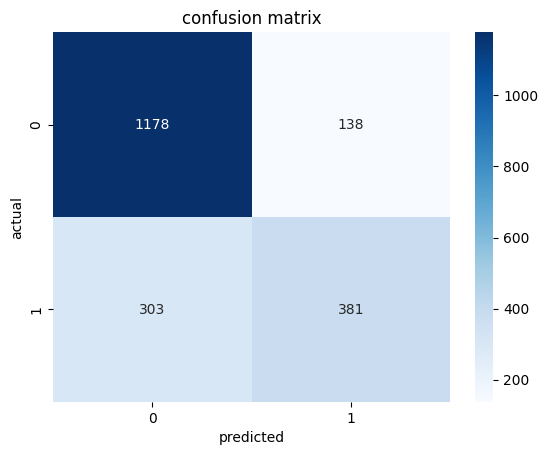

In [113]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("predicted")
plt.ylabel('actual')
plt.show()
